In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# pd.set_option('display.max_columns', 10)
# pd.set_option('display.max_rows', 100)


In [35]:
ds_path = r".\data\GermanyUsedCars.zip"
dfo = pd.read_csv(ds_path, index_col=0, dtype_backend='pyarrow')
# dfo = pd.read_csv(ds_path, index_col=0)
dfo.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km',
       'offer_description'],
      dtype='object')

### Data exploration

In [40]:
# dfo.shape
# dfo.isnull().count()
# dfo.isna().sum()
# dfo.isnull().sum()
# dfo.fuel_type.value_counts()
# dfo.color.value_counts()
# dfo.color.isna().sum()
# df.dtypes
# dfo.mileage_in_km.value_counts()
# dfo.mileage_in_km.isna().sum()
# dfo.dtypes
# dfo.shape[0] - pd.to_numeric(dfo.year, errors='coerce', dtype_backend = 'pyarrow').dropna(axis=0).shape[0]



195

### Data Cleansing

In [69]:
# drop non-numeric year values
df = dfo.copy()
df = df[~check_non_numeric(df.year)].assign(year = lambda x: x.year.astype(int))
# include only year values between (1900, 2023)
df = df.loc[df.year.between(1900, 2023)]

        
"number_of_droped_rows:", dfo.shape[0]- df.shape[0]

('number_of_droped_rows:', 199)

In [53]:
def check_non_numeric(s:pd.Series):
    # print (s.dtype)
    if 'pyarrow' in str(s.dtype):
        idx = pd.to_numeric(s, errors='coerce', dtype_backend='pyarrow').isna()
    else:
        idx = pd.to_numeric(s, errors='coerce').isna()
    return idx  # return index of non numeric


<Axes: xlabel='brand'>

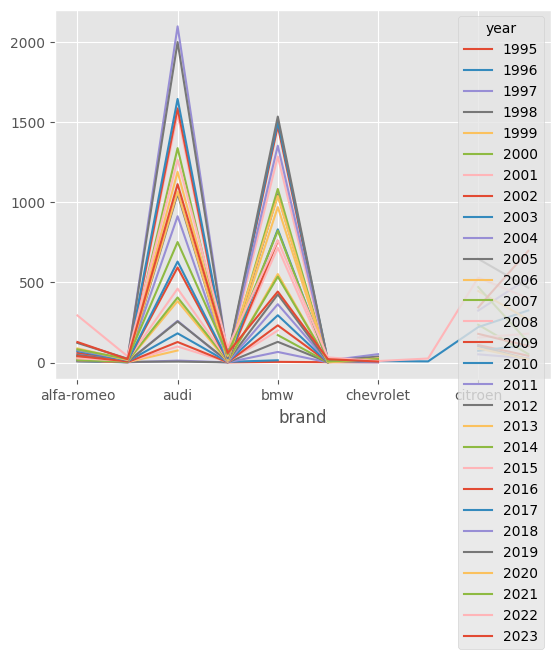

In [126]:
# df['year_inroduced'].value_counts().head().plot(kind='bar'| 'barh' | 'hist' , title=, xlabel=)
# 1
# df['year'].value_counts().plot(kind='barh', xlabel="# of cars", ylabel='Year Model', title="Number of Cars by Manufacture Year")
# plt.show()
df[['brand', 'year', 'model']].pivot_table( index= 'brand', columns=['year'], aggfunc='count',values='model', sort = False, margins=False).\
    head(10).plot()
# .plot( title='Top 20 cars')
# plt.show()

### Working 

In [ ]:
# dfo.head()
# dfo.brand.value_counts()
# dfo[['year', 'registration_date']].head()
# df = dfo.assign(year_e = pd.to_numeric(dfo.year, errors='coerce'))
# df = dfo.assign(years_in_service = 2023-pd.to_numeric(dfo.year, errors='coerce'))
# dfo.year.astype(int, errors='ignore') - 2023
df[['brand', 'year', 'price_in_euro']].groupby(['brand', 'year']).mean()
# 2023 - dfo.year.astype(int, errors='ignore')
# df.head()
# df.years_on_service
# df.years_in_service = 2023 - df.years_in_service
# df = df.loc[df.years_in_service >= 0]
# df[['year', 'year_e']].value_counts()
# df[['year']].value_counts()


In [ ]:
# pd.to_numeric(dfo.year, errors='coerce').value_counts()
pd.to_numeric(df.price_in_euro, errors='raise').value_counts().sort_index()
